In [1]:
import concurrent.futures
from pathlib import Path
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from tqdm import tqdm

# visuals.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
def read_df(path):
    try:
        return pd.read_csv(path)
    except Exception as err:
        print(err)


df = []
files = list(Path("./trades/processed/").glob("*.csv"))
with concurrent.futures.ThreadPoolExecutor() as executor:
    df.extend(tqdm(executor.map(read_df, files), total=len(files)))
df = pd.concat(df, ignore_index=True)

df["date"] = pd.to_datetime(df["date"])
df.sort_values(["date", "ticker"], inplace=True)
df

100%|██████████| 13/13 [00:00<00:00, 41527.76it/s]


,date,fund,ticker,company,signal,shares,Open,volume,abs_volume
47,2021-02-01,ARKW,API,AGORA INC,Sell,-54100,72.080002,-3.899528e+06,3.899528e+06
53,2021-02-01,ARKQ,AVAV,AEROVIRONMENT INC,Sell,-6132,120.040001,-7.360853e+05,7.360853e+05
41,2021-02-01,ARKK,BEAM,BEAM THERAPEUTICS INC,Buy,58218,99.709999,5.804917e+06,5.804917e+06
40,2021-02-01,ARKW,BEKE,KE HOLDINGS INC,Buy,110900,61.520000,6.822568e+06,6.822568e+06
50,2021-02-01,ARKQ,BYDDY,BYD CO LTD,Sell,-31503,64.339996,-2.026903e+06,2.026903e+06
...,...,...,...,...,...,...,...,...,...
193,2021-02-18,ARKK,TWLO,TWILIO INC,Sell,-93231,441.000000,-4.111487e+07,4.111487e+07
209,2021-02-18,ARKG,TWST,TWIST BIOSCIENCE CORP,Sell,-17850,148.630005,-2.653046e+06,2.653046e+06
197,2021-02-18,ARKK,TXG,10X GENOMICS INC,Buy,77728,183.440002,1.425842e+07,1.425842e+07
215,2021-02-18,ARKG,VCYT,VERACYTE INC,Sell,-6690,70.889999,-4.742541e+05,4.742541e+05


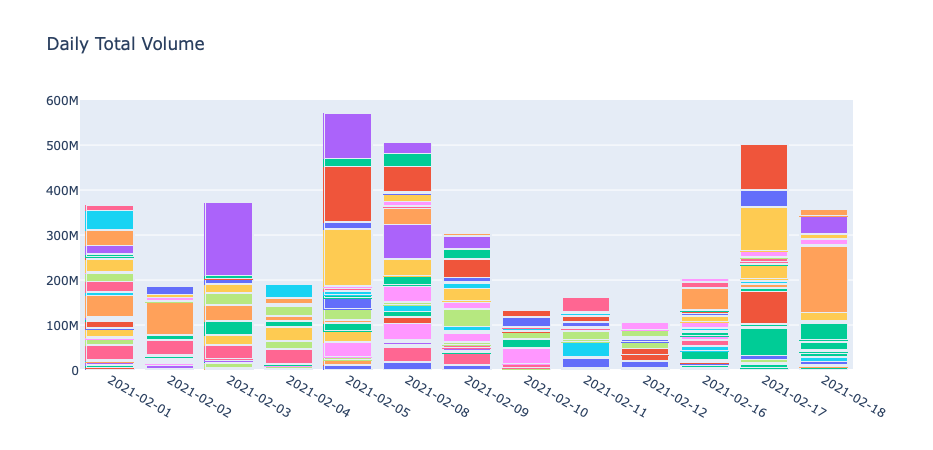

In [23]:
# group bar chart
def group_bc_traces(x, y, hue, groups, df, agg=np.sum, legend=False):
    # creates a grouped barchart according to hue (color)
    
    groups = groups.copy()
    groups.append(hue)
    groups_df = df.groupby(groups).agg(agg).reset_index()
    
    traces = []
    for v in df[hue].unique():
        trace = go.Bar(name=v, showlegend=legend, x=groups_df[groups_df[hue]==v][x].astype(str), y=groups_df[groups_df[hue]==v][y])
        traces.append(trace)
        
    return traces

def plot_traces(traces):
    # plots several traces
    fig = go.Figure()
    
    for t in traces:
        fig.add_trace(t)
        
    return fig

traces = group_bc_traces("date", "abs_volume", "ticker", ["date"], df)
fig = plot_traces(traces)
fig.update_layout(
    title="Daily Total Volume",
    barmode='stack',
    xaxis={'categoryorder':'category ascending', 'type': 'category'}
)
fig.show()

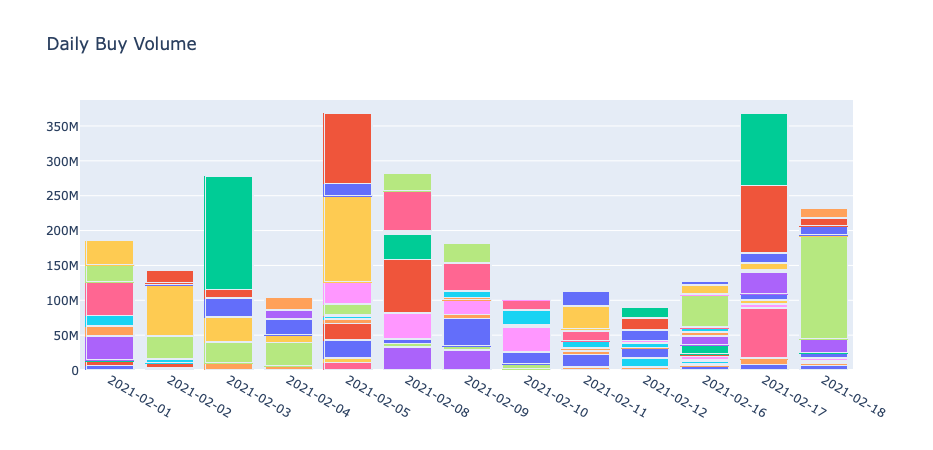

In [24]:
traces = group_bc_traces("date", "abs_volume", "ticker", ["date"], df[df["signal"]=="Buy"])
fig = plot_traces(traces)
fig.update_layout(
    title="Daily Buy Volume",
    barmode='stack',
    xaxis={'categoryorder':'category ascending', 'type': 'category'}
)
fig.show()

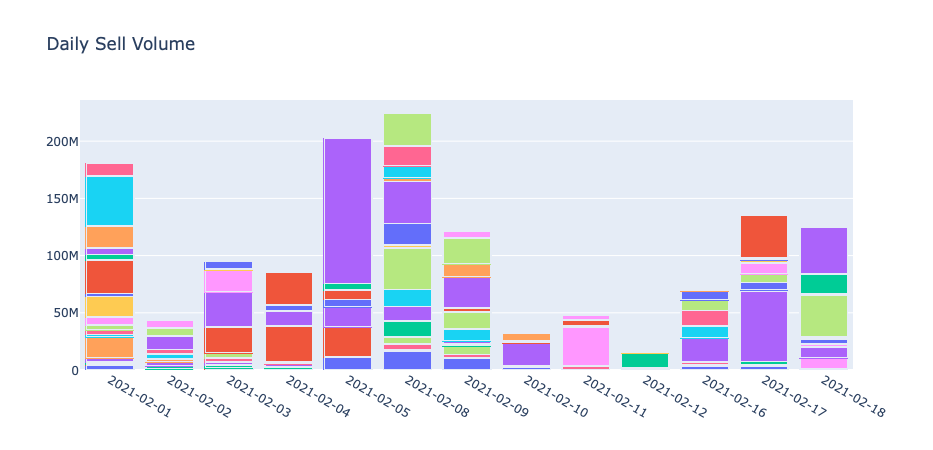

In [25]:
traces = group_bc_traces("date", "abs_volume", "ticker", ["date"], df[df["signal"]=="Sell"])
fig = plot_traces(traces)
fig.update_layout(
    title="Daily Sell Volume",
    barmode='stack',
    xaxis={'categoryorder':'category ascending', 'type': 'category'}
)
fig.show()